# Black Marble PY

Short intro notebook to showcase how to use the Black Marble dataset.


## Authorization

In order to access the data, we need to authorize to the server with a special token called a "Bearer token". This is conveniently stored as an environment variable in the Conda environment (assuming you have followed the setup instructions from the `README.md`). We get the token here for use later in the code.

This notebook is based on the documentation of the `blackmarblepy` package. You can look through it here: <https://worldbank.github.io/blackmarblepy/notebooks/blackmarblepy.html>


## Area of Interest

Next, we need to define a geographic area of interest. You can get the necessary file from [GADM](https://gadm.org/download_country.html). There, choose the area of interest, and then look for `GeoJSON: level1`, right-click the link and select "Copy Link URL" (or similar). Then paste it in the cell below.


In [ ]:
import sys
from pathlib import Path

import requests
from lib.config import DATA_DIR

# We download the file locally to avoid having to download it every time
GDF_URL = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_MMR_1.json.zip"
GDF_DOWNLOAD_PATH = DATA_DIR / Path(GDF_URL).name

if not GDF_DOWNLOAD_PATH.exists():
    print(f"Downloading to {GDF_DOWNLOAD_PATH}")
    response = requests.get(GDF_URL)
    if response.status_code >= 400:
        print("Failed to download GDF. Please double-check the URL and try again.")
        sys.exit(1)
    GDF_DOWNLOAD_PATH.write_bytes(response.content)
    print("GDF successfully downloaded")
else:
    print("GDF already downloaded, skipping...")
    print("Please delete the file and re-run this cell if the remote data is newer.")

GDF already downloaded, skipping...
Please delete the file and re-run this cell if the remote data is newer.


In [3]:
import geopandas

gdf = geopandas.read_file(GDF_DOWNLOAD_PATH)
gdf.explore(tiles="CartoDB dark_matter")

In [ ]:
from datetime import date

from blackmarble.raster import bm_raster
from blackmarble.types import Product
from lib.config import BM_TOKEN

# Create output directory
BLACKMARBLE_OUTPUT_DIR = DATA_DIR / "blackmarble"
BLACKMARBLE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Daily data: raster for February 5, 2021
VNP46A2_20190327 = bm_raster(
    gdf,
    product_id=Product.VNP46A2,
    date_range=date.fromisoformat("2019-03-27"),
    bearer=BM_TOKEN,
    output_directory=BLACKMARBLE_OUTPUT_DIR,
)
VNP46A2_20190327

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 81MB
Dimensions:                            (x: 2161, y: 4675, time: 1)
Coordinates:
  * x                                  (x) float64 17kB 92.17 92.18 ... 101.2
  * y                                  (y) float64 37kB 28.54 28.54 ... 9.065
  * time                               (time) datetime64[ns] 8B 2019-03-27
Data variables:
    Gap_Filled_DNB_BRDF-Corrected_NTL  (time, y, x) float64 81MB nan nan ... nan
Attributes: (12/41)
    AlgorithmType:                     b'SCI'
    DataResolution:                    b'Moderate'
    DayNightFlag:                      b'Day'
    EastBoundingCoord:                 100.0
    EndTime:                           b'2019-03-27 23:59:59.000'
    GranuleDayNightFlag:               b'Day'
    ...                                ...
    VersionID:                         b'001'
    VerticalTileNumber:                b'07'
    WestBoundingCoord:                 90.0
    AREA_OR_POINT:                     Area
    scale_factor:                      1.0
    add_offset:                        0.0

## Visualize Daily Radiance

The following code displays the daily radiance for the region of interest (ROI).


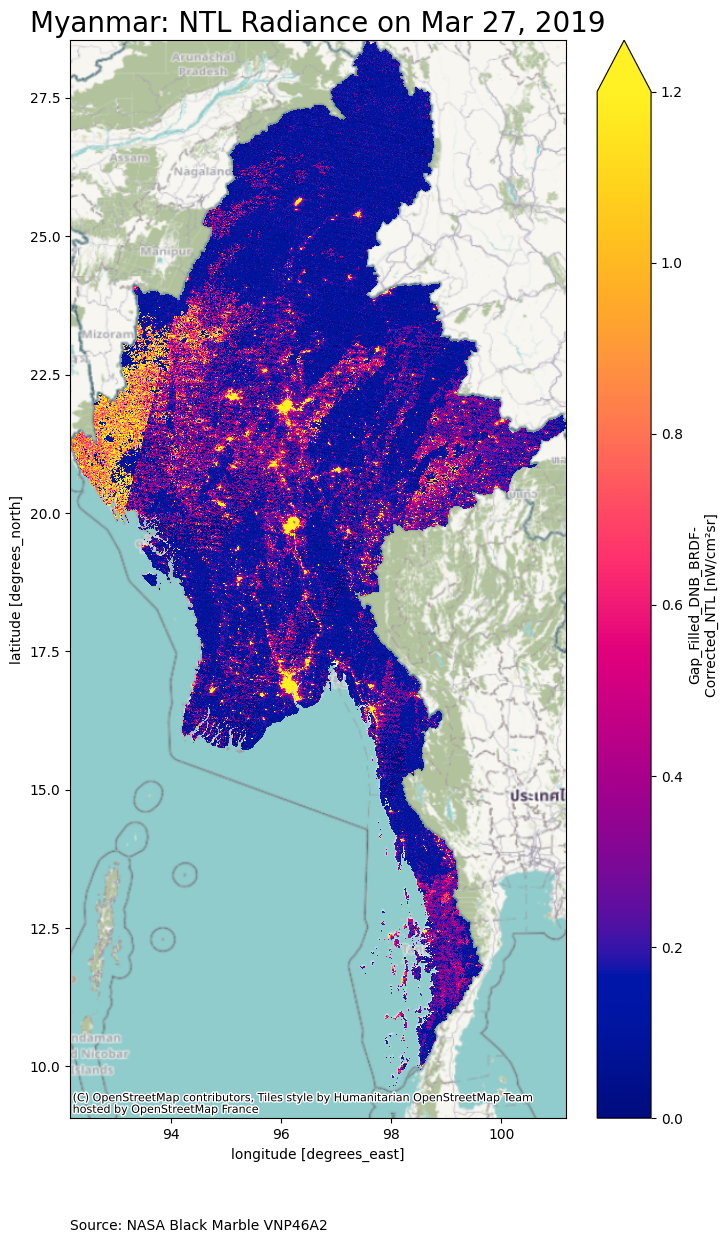

In [6]:
import colorcet as cc
import contextily as cx
import matplotlib.pyplot as plt


def plot_day():
    fig, ax = plt.subplots(figsize=(8, 14))

    VNP46A2_20190327["Gap_Filled_DNB_BRDF-Corrected_NTL"].sel(time="2019-03-27").plot.pcolormesh(
        ax=ax,
        cmap=cc.cm.bmy,
        robust=True,
    )
    assert gdf.crs is not None
    cx.add_basemap(ax, crs=gdf.crs.to_string())

    ax.text(
        0,
        -0.1,
        "Source: NASA Black Marble VNP46A2",
        ha="left",
        va="center",
        transform=ax.transAxes,
        fontsize=10,
        color="black",
        weight="normal",
    )
    ax.set_title("Myanmar: NTL Radiance on Mar 27, 2019", fontsize=20)


plot_day()

In [6]:
from datetime import date

from blackmarble.raster import bm_raster
from blackmarble.types import Product
from tqdm.notebook import tqdm

# Create output directory
BLACKMARBLE_OUTPUT_DIR = DATA_DIR / "blackmarble"
BLACKMARBLE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
CSV_PATH = "../dates_luojia_myanmar.csv"

date_to_raster = {}

with open(CSV_PATH) as f:
    for date_string in (pb := tqdm([l.strip() for l in f], desc="PROCESSING DATES")):
        if date_string not in date_to_raster:
            date_to_raster[date_string] = bm_raster(
                gdf,
                product_id=Product.VNP46A2,
                date_range=date.fromisoformat(date_string),
                bearer=BEARER_TOKEN,
                output_directory=BLACKMARBLE_OUTPUT_DIR,
            )

PROCESSING DATES:   0%|          | 0/19 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/3.46M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

[2025-04-07 19:55:39 - backoff:105 - INFO] Backing off get_url(...) for 0.4s (httpx.ReadTimeout)


QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/783k [00:00<?, ?B/s]

  0%|          | 0.00/4.70M [00:00<?, ?B/s]

  0%|          | 0.00/2.33M [00:00<?, ?B/s]

  0%|          | 0.00/5.80M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/4.47M [00:00<?, ?B/s]

  0%|          | 0.00/853k [00:00<?, ?B/s]

  0%|          | 0.00/1.78M [00:00<?, ?B/s]

  0%|          | 0.00/4.92M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

[2025-04-07 19:56:06 - backoff:105 - INFO] Backing off get_url(...) for 0.3s (httpx.ReadTimeout)


QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/5.58M [00:00<?, ?B/s]

  0%|          | 0.00/1.20M [00:00<?, ?B/s]

  0%|          | 0.00/1.04M [00:00<?, ?B/s]

  0%|          | 0.00/5.51M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/1.48M [00:00<?, ?B/s]

  0%|          | 0.00/5.93M [00:00<?, ?B/s]

  0%|          | 0.00/4.45M [00:00<?, ?B/s]

  0%|          | 0.00/1.14M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/4.51M [00:00<?, ?B/s]

  0%|          | 0.00/956k [00:00<?, ?B/s]

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

  0%|          | 0.00/2.68M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/6.43M [00:00<?, ?B/s]

  0%|          | 0.00/743k [00:00<?, ?B/s]

  0%|          | 0.00/2.00M [00:00<?, ?B/s]

  0%|          | 0.00/5.00M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/4.69M [00:00<?, ?B/s]

  0%|          | 0.00/4.42M [00:00<?, ?B/s]

  0%|          | 0.00/1.79M [00:00<?, ?B/s]

  0%|          | 0.00/921k [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/752k [00:00<?, ?B/s]

  0%|          | 0.00/4.35M [00:00<?, ?B/s]

  0%|          | 0.00/1.51M [00:00<?, ?B/s]

  0%|          | 0.00/4.90M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/826k [00:00<?, ?B/s]

  0%|          | 0.00/6.31M [00:00<?, ?B/s]

  0%|          | 0.00/4.97M [00:00<?, ?B/s]

  0%|          | 0.00/2.36M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/5.11M [00:00<?, ?B/s]

  0%|          | 0.00/1.16M [00:00<?, ?B/s]

  0%|          | 0.00/2.32M [00:00<?, ?B/s]

  0%|          | 0.00/7.01M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/965k [00:00<?, ?B/s]

  0%|          | 0.00/5.71M [00:00<?, ?B/s]

  0%|          | 0.00/6.18M [00:00<?, ?B/s]

  0%|          | 0.00/2.21M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/1.30M [00:00<?, ?B/s]

  0%|          | 0.00/5.06M [00:00<?, ?B/s]

  0%|          | 0.00/4.02M [00:00<?, ?B/s]

  0%|          | 0.00/723k [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/5.42M [00:00<?, ?B/s]

  0%|          | 0.00/836k [00:00<?, ?B/s]

  0%|          | 0.00/2.37M [00:00<?, ?B/s]

[2025-04-07 19:58:16 - backoff:105 - INFO] Backing off _download_file(...) for 0.7s (httpx.ReadTimeout: The read operation timed out)


  0%|          | 0.00/4.54M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.30M [00:00<?, ?B/s]

  0%|          | 0.00/3.76M [00:00<?, ?B/s]

  0%|          | 0.00/4.01M [00:00<?, ?B/s]

  0%|          | 0.00/1.25M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.36M [00:00<?, ?B/s]

  0%|          | 0.00/4.47M [00:00<?, ?B/s]

  0%|          | 0.00/787k [00:00<?, ?B/s]

  0%|          | 0.00/5.89M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/1.12M [00:00<?, ?B/s]

  0%|          | 0.00/5.81M [00:00<?, ?B/s]

  0%|          | 0.00/4.68M [00:00<?, ?B/s]

  0%|          | 0.00/2.46M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0.00/2.47M [00:00<?, ?B/s]

  0%|          | 0.00/3.80M [00:00<?, ?B/s]

[2025-04-07 19:59:26 - backoff:105 - INFO] Backing off _download_file(...) for 0.0s (httpx.ReadTimeout: The read operation timed out)
[2025-04-07 19:59:26 - backoff:105 - INFO] Backing off _download_file(...) for 0.8s (httpx.ReadTimeout: The read operation timed out)


  0%|          | 0.00/4.85M [00:00<?, ?B/s]

  0%|          | 0.00/1.26M [00:00<?, ?B/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]

GETTING MANIFEST...:   0%|          | 0/4 [00:00<?, ?it/s]

QUEUEING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

PROCESSING TASKS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLECTING RESULTS | Downloading...:   0%|          | 0/4 [00:00<?, ?it/s]

COLLATING RESULTS | Processing...:   0%|          | 0/1 [00:00<?, ?it/s]